In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('max_rows', 20)

plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 3)
plt.rcParams['font.family'] = 'sans-serif'

In [3]:
AQI_FILEPATH = os.path.join(os.curdir, 'data', 'aqi.csv')

df = pd.read_csv(filepath_or_buffer=AQI_FILEPATH, parse_dates=['datetime'], index_col='datetime', na_values='NR')
df_bak = df.copy()

# 保留降雨量為 NR 值的資料
df_withnr = pd.read_csv(filepath_or_buffer=AQI_FILEPATH, parse_dates=['datetime'], index_col='datetime')
df_withnr_bak = df_withnr.copy()

# 保留還未將 datetime 設為 index 的資料
df_noindex = pd.read_csv(filepath_or_buffer=AQI_FILEPATH)
df_noindex_bak = df_noindex.copy()

# 讀取未處理過的原始資料
AQI_ORIG_FILEPATH = os.path.join(os.curdir, 'data', 'aqi_original.csv')

df_orig = pd.read_csv(AQI_ORIG_FILEPATH)
df_orig_bak = df_orig.copy()

# 讀取還未使用 pivot_table() 處理過的資料
AQI_NOPIVOT_FILEPATH = os.path.join(os.curdir, 'data', 'aqi_nopivot.csv')

df_nopivot = pd.read_csv(AQI_NOPIVOT_FILEPATH, na_values=['NR'])
df_nopivot.replace(r'[-]?\D*[.]?\D*[#*x]+', np.nan, regex=True, inplace=True)
df_nopivot.loc[:, 'value'] = df_nopivot.loc[:, 'value'].astype(np.float64)
df_nopivot_bak = df_orig.copy()

In [4]:
df.head()

,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10,PM2.5,RAINFALL,RH,SO2,THC,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR
datetime,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,20.0,2.0,0.20,0.04,1.7,7.5,9.2,25.0,67.0,18.0,NaN,88.0,1.5,2.0,33.0,37.0,1.4,0.1
2017-01-01 01:00:00,20.0,2.2,0.19,0.05,1.9,7.9,9.8,18.0,52.0,14.0,NaN,88.0,2.1,2.2,76.0,143.0,0.5,0.6
2017-01-01 02:00:00,19.0,2.2,0.24,0.08,2.0,9.3,11.0,13.0,59.0,17.0,NaN,89.0,2.0,2.3,140.0,142.0,0.5,0.6
2017-01-01 03:00:00,19.0,2.4,0.24,0.11,1.4,9.5,11.0,8.5,53.0,24.0,NaN,90.0,1.8,2.5,107.0,51.0,0.5,0.4
2017-01-01 04:00:00,18.0,3.4,0.23,0.12,6.8,11.0,17.0,1.8,37.0,25.0,NaN,90.0,1.7,3.6,96.0,106.0,1.0,0.5


# 第 6 章：修改資料

有時候僅僅執行運算或是篩選是不夠的。我們常常聽到「清理資料」的名詞，意思就是在分析以前，資料常常要經過大規模的整理，才能夠被順利地使用。

這個章節將會介紹許多涵蓋整份資料結構改變的操作，例如轉換資料型別、轉置、或是將部分資料結合再運算、以及清除遺漏的值、也可能要進行補值。

希望經過這些處理以後，可以讓各位要進行分析的數據更完整、也更準確！

## 修正資料

### 利用 `.loc` 和 `.iloc` 在特定範圍修改資料

`.loc`, `.iloc` attribute 除了可以取得指定範圍的資料之外，也可以用來編輯該範圍的資料內容。

編輯多筆資料時，請注意資料的形狀是否與指定的範圍相同；而如果只對她們指定單一數值，將會把該範圍的數值都用單一數值取代。

In [5]:
# 觀察降雨量 (column label: 'RAINFALL') 中，無降雨量資料的情況
df.loc[:, 'RAINFALL'].head(10)

datetime
2017-01-01 00:00:00   NaN
2017-01-01 01:00:00   NaN
2017-01-01 02:00:00   NaN
2017-01-01 03:00:00   NaN
2017-01-01 04:00:00   NaN
2017-01-01 05:00:00   NaN
2017-01-01 06:00:00   NaN
2017-01-01 07:00:00   NaN
2017-01-01 08:00:00   NaN
2017-01-01 09:00:00   NaN
Name: RAINFALL, dtype: float64

In [6]:
# 例：利用先前介紹的 isna() 來為遺漏值補值
rainfall_isna = df.loc[:, 'RAINFALL'].isna()
df.loc[rainfall_isna, :] = 0
display(df.loc[:, 'RAINFALL'].head(10))

# 當然，這了例子使用這種做法不夠直覺
# 我們之後還會講到 `.fillna()` method，更好用！

# 還原資料
df = df_bak.copy()

datetime
2017-01-01 00:00:00    0.0
2017-01-01 01:00:00    0.0
2017-01-01 02:00:00    0.0
2017-01-01 03:00:00    0.0
2017-01-01 04:00:00    0.0
2017-01-01 05:00:00    0.0
2017-01-01 06:00:00    0.0
2017-01-01 07:00:00    0.0
2017-01-01 08:00:00    0.0
2017-01-01 09:00:00    0.0
Name: RAINFALL, dtype: float64

### `.replace()`：替換數值

`.replace()` method 的用法，除了單純將固定的數值或文字替換掉以外，更進階且快速的用法則可以使用正規表示式來建立取代的條件，礙於篇幅無法介紹，請自行參閱正規表示式的相關文章。

* 常用 Parameters：
    1. `inplace`：是否選擇直接修改資料而不回傳處理結果，預設為 `False`
* 參考文件：
    * [pandas.DataFrame.replace](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.replace.html)
    * [pandas.Series.replace](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.replace.html)
    * [Wikipedia | 正規表示式](https://zh.wikipedia.org/zh-tw/正規表示式)


In [7]:
# 觀察降雨量 (column label: 'RAINFALL') 中，
# 無降雨量資料 (NR) 的情況
df_withnr.loc[:, 'RAINFALL'].head(10)

datetime
2017-01-01 00:00:00    NR
2017-01-01 01:00:00    NR
2017-01-01 02:00:00    NR
2017-01-01 03:00:00    NR
2017-01-01 04:00:00    NR
2017-01-01 05:00:00    NR
2017-01-01 06:00:00    NR
2017-01-01 07:00:00    NR
2017-01-01 08:00:00    NR
2017-01-01 09:00:00    NR
Name: RAINFALL, dtype: object

In [8]:
# 將降雨量數值為 NR 的取代成 0
df_withnr.replace({'RAINFALL': {'NR': 0}}, inplace=True)
display(df_withnr.loc[:, 'RAINFALL'].head(10))

# 還原資料
df_withnr = df_withnr_bak.copy()

datetime
2017-01-01 00:00:00    0
2017-01-01 01:00:00    0
2017-01-01 02:00:00    0
2017-01-01 03:00:00    0
2017-01-01 04:00:00    0
2017-01-01 05:00:00    0
2017-01-01 06:00:00    0
2017-01-01 07:00:00    0
2017-01-01 08:00:00    0
2017-01-01 09:00:00    0
Name: RAINFALL, dtype: object

### `.rename()`：編輯 Row 或 Column 的 Label

如果 label 不易辨識或是不如預期時，之後操作時出錯的機率可能會上升，像是取錯 column 放入其他函式的問題，造成結果也是錯的。為了避免這種情況發生，事前將 label 準備成容易一眼辨識的名稱也是很重要的。

取代規則的格式可以是一個 `dict` 物件，他們的 key 跟 value 則分別是**被取代的 label** 跟**取代之後的 label**；也可以放入一個 function。

參考文件：
* [pandas.DataFrame.rename](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html#pandas.DataFrame.rename)
* [pandas.Series.rename](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.rename.html)
    

In [9]:
# 示範使用 dict (Dictionary) 逐一修改
# 例：將 columns label 為 'AMB_TEMP' 以及 'WIND_SPEED'
# 改成小寫英文字母，且將 '_' 改成 ' '
df.rename(columns={'AMB_TEMP':'amb temp', 'WIND_SPEED':'wind speed'}, inplace=True)
display(df.columns)

# 還原資料
df = df_bak.copy()

Index(['amb temp', 'CH4', 'CO', 'NMHC', 'NO', 'NO2', 'NOx', 'O3', 'PM10',
       'PM2.5', 'RAINFALL', 'RH', 'SO2', 'THC', 'WD_HR', 'WIND_DIREC',
       'wind speed', 'WS_HR'],
      dtype='object')

In [10]:
# 示範使用 lambda function
# 例：將所有 columns label 改成小寫英文字母，且將 '_' 改成 ' '
df.rename(columns=lambda x: x.lower().replace('_', ' '), inplace=True)
display(df.columns)

# 還原資料
df = df_bak.copy()

Index(['amb temp', 'ch4', 'co', 'nmhc', 'no', 'no2', 'nox', 'o3', 'pm10',
       'pm2.5', 'rainfall', 'rh', 'so2', 'thc', 'wd hr', 'wind direc',
       'wind speed', 'ws hr'],
      dtype='object')

### `.sort_values()`：以數值大小排序

適當的將資料給排序也有助於觀察資料的樣態。這裡先介紹的是依照數值大小來排序的 method，往後還會介紹到針對 index (row index) 來排序的 method。

* 常用 Parameters（以 DataFrame 為例）：
    1. `axis`：操作的座標軸
        * `0`：將 dataframe 以 row 方向排序
        * `1`：將 dataframe 以 column 方向排序
    1. `by`：設定排序參照的對象
        * `str`：以某一個 columns label 或 row label 排序
        * `list`：依照順序以多個 columns label 或 row label 排序
    1. `ascending`：是否使用升冪排序，預設為 `True`
    1. `na_position`：資料中有 `NaN` 數值時，指定排序後要將 `NaN` 放置於開頭或結尾，預設為 `last`
        * `first`：把 NaN 放在開頭
        * `last`：把 NaN 放在最後
    1. `inplace`：是否選擇直接修改資料而不回傳處理結果，預設為 `False`
* 參考文件：
    * [pandas.DataFrame.sort_values](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html)
    * [pandas.Series.sort_values](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.sort_values.html)


In [11]:
# 將資料以一氧化碳 (columns label: 'CO') 由小到大排序，且 NaN 放在開頭
df.sort_values(axis=0, by='CO', ascending=True, na_position='first', inplace=True)
display(df.loc[:, 'CO'].tail(10))

# 還原資料
df = df_bak.copy()

datetime
2017-01-10 00:00:00    0.85
2017-03-13 07:00:00    0.87
2017-04-26 06:00:00    0.87
2017-09-18 00:00:00    0.88
2017-03-10 08:00:00    0.95
2017-03-03 07:00:00    1.00
2017-02-15 07:00:00    1.04
2017-03-10 07:00:00    1.04
2017-04-26 07:00:00    1.14
2017-09-05 14:00:00    1.84
Name: CO, dtype: float64

In [12]:
# Series 也可以調用 sort_values()
df.loc[:, 'CO'].sort_values(ascending=False).head(10)

datetime
2017-09-05 14:00:00    1.84
2017-04-26 07:00:00    1.14
2017-03-10 07:00:00    1.04
2017-02-15 07:00:00    1.04
2017-03-03 07:00:00    1.00
2017-03-10 08:00:00    0.95
2017-09-18 00:00:00    0.88
2017-04-26 06:00:00    0.87
2017-03-13 07:00:00    0.87
2017-01-10 00:00:00    0.85
Name: CO, dtype: float64

### `.sort_index()`：以 Index Label 大小排序

比較常見的情況在於使用 `datetime` 物件當作 row index 時，可以讓資料依照時間順序來排列。

* 常用 Parameters : 
    1. `axis`：操作的座標軸
        * `0`：將 dataframe 以 row 方向排序
        * `1`：將 dataframe 以 column 方向排序
    1. `ascending`：是否使用升冪排序，預設為 `True`
    1. `inplace`：是否選擇直接修改資料而不回傳處理結果，預設為 `False`
* 參考文件：
    * [pandas.DataFrame.sort_index](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_index.html)
    * [pandas.Series.sort_index](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.sort_values.html)


In [13]:
# 將資料以 row index 降冪排序
df.sort_index(ascending=False, inplace=True)
display(df.head())

# 還原資料
df = df_bak.copy()

,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10,PM2.5,RAINFALL,RH,SO2,THC,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR
datetime,,,,,,,,,,,,,,,,,,
2017-12-31 23:00:00,17.0,1.9,0.45,0.06,1.0,20.0,21.0,21.0,77.0,35.0,NaN,70.0,6.8,2.0,16.0,19.0,3.8,3.9
2017-12-31 22:00:00,17.0,1.9,0.46,0.08,0.9,20.0,21.0,21.0,82.0,41.0,NaN,72.0,6.0,2.0,14.0,15.0,4.2,4.0
2017-12-31 21:00:00,17.0,1.9,0.49,0.09,0.9,17.0,18.0,25.0,91.0,44.0,NaN,73.0,4.3,2.0,12.0,14.0,3.8,4.6
2017-12-31 20:00:00,17.0,2.0,0.53,0.10,0.9,18.0,19.0,23.0,82.0,48.0,NaN,73.0,4.8,2.1,11.0,11.0,4.5,5.0
2017-12-31 19:00:00,17.0,2.0,0.57,0.11,0.9,16.0,17.0,25.0,88.0,53.0,NaN,73.0,3.8,2.1,11.0,11.0,5.6,5.6


In [14]:
# 將 columns index 升冪（字母 A 到 Z 排序）
df.sort_index(axis=1, inplace=True, ascending=True)
display(df.head())

# 還原資料
df = df_bak.copy()

,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10,PM2.5,RAINFALL,RH,SO2,THC,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR
datetime,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,20.0,2.0,0.20,0.04,1.7,7.5,9.2,25.0,67.0,18.0,NaN,88.0,1.5,2.0,33.0,37.0,1.4,0.1
2017-01-01 01:00:00,20.0,2.2,0.19,0.05,1.9,7.9,9.8,18.0,52.0,14.0,NaN,88.0,2.1,2.2,76.0,143.0,0.5,0.6
2017-01-01 02:00:00,19.0,2.2,0.24,0.08,2.0,9.3,11.0,13.0,59.0,17.0,NaN,89.0,2.0,2.3,140.0,142.0,0.5,0.6
2017-01-01 03:00:00,19.0,2.4,0.24,0.11,1.4,9.5,11.0,8.5,53.0,24.0,NaN,90.0,1.8,2.5,107.0,51.0,0.5,0.4
2017-01-01 04:00:00,18.0,3.4,0.23,0.12,6.8,11.0,17.0,1.8,37.0,25.0,NaN,90.0,1.7,3.6,96.0,106.0,1.0,0.5


### `.reset_index()`：重設 Index Label 

預設會將 row index 給重設為從 0 開始的數列，在常見的使用情境在資料列有修改的情況，例如用 `.drop()` method 刪除部分的 row 以後。

* 常用 Parameters：
    1. `drop`：重設 index 之後是否刪除被取代的 index
        * `True`：刪除原始的 row index
        * `False`：保留原始的 row index
    1. `inplace`：是否選擇直接修改資料而不回傳處理結果，預設為 `False`
* 參考文件：
    * [pandas.DataFrame.reset_index](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reset_index.html)
    * [pandas.Series.reset_index](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.reset_index.html)

In [15]:
# 觀察一下原本的 index label
df.head()

,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10,PM2.5,RAINFALL,RH,SO2,THC,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR
datetime,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,20.0,2.0,0.20,0.04,1.7,7.5,9.2,25.0,67.0,18.0,NaN,88.0,1.5,2.0,33.0,37.0,1.4,0.1
2017-01-01 01:00:00,20.0,2.2,0.19,0.05,1.9,7.9,9.8,18.0,52.0,14.0,NaN,88.0,2.1,2.2,76.0,143.0,0.5,0.6
2017-01-01 02:00:00,19.0,2.2,0.24,0.08,2.0,9.3,11.0,13.0,59.0,17.0,NaN,89.0,2.0,2.3,140.0,142.0,0.5,0.6
2017-01-01 03:00:00,19.0,2.4,0.24,0.11,1.4,9.5,11.0,8.5,53.0,24.0,NaN,90.0,1.8,2.5,107.0,51.0,0.5,0.4
2017-01-01 04:00:00,18.0,3.4,0.23,0.12,6.8,11.0,17.0,1.8,37.0,25.0,NaN,90.0,1.7,3.6,96.0,106.0,1.0,0.5


In [16]:
# 重設 index label 且保留原本的 index label 作為一個 column
df.reset_index(drop=False).head()

,datetime,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10,PM2.5,RAINFALL,RH,SO2,THC,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR
0,2017-01-01 00:00:00,20.0,2.0,0.20,0.04,1.7,7.5,9.2,25.0,67.0,18.0,NaN,88.0,1.5,2.0,33.0,37.0,1.4,0.1
1,2017-01-01 01:00:00,20.0,2.2,0.19,0.05,1.9,7.9,9.8,18.0,52.0,14.0,NaN,88.0,2.1,2.2,76.0,143.0,0.5,0.6
2,2017-01-01 02:00:00,19.0,2.2,0.24,0.08,2.0,9.3,11.0,13.0,59.0,17.0,NaN,89.0,2.0,2.3,140.0,142.0,0.5,0.6
3,2017-01-01 03:00:00,19.0,2.4,0.24,0.11,1.4,9.5,11.0,8.5,53.0,24.0,NaN,90.0,1.8,2.5,107.0,51.0,0.5,0.4
4,2017-01-01 04:00:00,18.0,3.4,0.23,0.12,6.8,11.0,17.0,1.8,37.0,25.0,NaN,90.0,1.7,3.6,96.0,106.0,1.0,0.5


In [17]:
# 重設 index label 且"不"保留原本的 index label
df.reset_index(drop=True).head()

,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10,PM2.5,RAINFALL,RH,SO2,THC,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR
0,20.0,2.0,0.20,0.04,1.7,7.5,9.2,25.0,67.0,18.0,NaN,88.0,1.5,2.0,33.0,37.0,1.4,0.1
1,20.0,2.2,0.19,0.05,1.9,7.9,9.8,18.0,52.0,14.0,NaN,88.0,2.1,2.2,76.0,143.0,0.5,0.6
2,19.0,2.2,0.24,0.08,2.0,9.3,11.0,13.0,59.0,17.0,NaN,89.0,2.0,2.3,140.0,142.0,0.5,0.6
3,19.0,2.4,0.24,0.11,1.4,9.5,11.0,8.5,53.0,24.0,NaN,90.0,1.8,2.5,107.0,51.0,0.5,0.4
4,18.0,3.4,0.23,0.12,6.8,11.0,17.0,1.8,37.0,25.0,NaN,90.0,1.7,3.6,96.0,106.0,1.0,0.5


### `.set_index()`：將某個 Column (Column Labels) 設為 Index (Row Labels)

調用 `set_index()` method 以將目前的 index (row labels) 用某個 column 的內容 (column labels) 來取代，常見的情境可以將帶有 `datetime` 物件的 column 給設為 index。

參考文件：[pandas.DataFrame.set_index](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.set_index.html)

    

In [18]:
# set_index
# 將 日期 設定為 index
df_noindex.set_index('datetime', inplace=True)
display(df_noindex.head())

# 還原資料
df_noindex = df_noindex_bak.copy()

,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10,PM2.5,RAINFALL,RH,SO2,THC,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR
datetime,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,20.0,2.0,0.20,0.04,1.7,7.5,9.2,25.0,67.0,18.0,NR,88.0,1.5,2.0,33.0,37.0,1.4,0.1
2017-01-01 01:00:00,20.0,2.2,0.19,0.05,1.9,7.9,9.8,18.0,52.0,14.0,NR,88.0,2.1,2.2,76.0,143.0,0.5,0.6
2017-01-01 02:00:00,19.0,2.2,0.24,0.08,2.0,9.3,11.0,13.0,59.0,17.0,NR,89.0,2.0,2.3,140.0,142.0,0.5,0.6
2017-01-01 03:00:00,19.0,2.4,0.24,0.11,1.4,9.5,11.0,8.5,53.0,24.0,NR,90.0,1.8,2.5,107.0,51.0,0.5,0.4
2017-01-01 04:00:00,18.0,3.4,0.23,0.12,6.8,11.0,17.0,1.8,37.0,25.0,NR,90.0,1.7,3.6,96.0,106.0,1.0,0.5


### `.drop()`：刪除特定的 row 或 column


調用 `drop()` method 可以用來刪除指定的 row/column。

使用時，可以在 parameter `labels` 指定要刪除的 index (row label) 或是 column (column label)，或是個別在 parameter `index` 或 `columns` 指定要刪除的 label。

* 文件連結：
    * [pandas.DataFrame.drop](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html)
    * [pandas.Series.drop](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.drop.html)



In [19]:
# 先使用 describe 觀察非甲烷碳氫化合物 (column label: 'NMHC') 的資料分佈
df['NMHC'].describe()

count    8662.000000
mean        0.072598
std         0.077559
min        -0.030000
25%         0.040000
50%         0.060000
75%         0.090000
max         3.090000
Name: NMHC, dtype: float64

In [20]:
# 例：刪除非甲烷碳氫化合物為負值的資料
# 使用 boolean index 取得非甲烷碳氫化合物 為 0 的 index (row label)
nmhc_iszero_indexes = df.loc[df['NMHC'] == 0, :].index

# 使用 drop 將這些 index (row label) 的資料刪除
# 再觀察資料分佈
df.drop(index=nmhc_iszero_indexes)['NMHC'].describe()

count    8580.000000
mean        0.073291
std         0.077601
min        -0.030000
25%         0.040000
50%         0.060000
75%         0.090000
max         3.090000
Name: NMHC, dtype: float64

### `.dropna()`：刪除遺漏值 (NA)

將資料中帶有遺漏值的部分給刪除。

* 常用 Parameters：
    1. `axis`：操作的座標軸
        * `0`：將 dataframe 以 row 方向排序
        * `1`：將 dataframe 以 column 方向排序
    1. `how`：刪除資料的策略，預設為 `any`
        * `all`：若此 column 或 row 的每一個數值全部都是 `NaN`，才刪除此 column 或 index
        * `any`：若此 column 或 row 的只要有任何數值為 `NaN`，就刪除此 column  或 index
* 參考文件：
    * [pandas.DataFrame.dropna](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html)
    * [pandas.Series.dropna](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.dropna.html)

In [21]:
# 先製作一個比較小的 DataFrame 來展示功能
tmp_dropna = pd.DataFrame({"A" : [10, 10, 11, np.nan], 
                           "B" : [5.5, 5.5, np.nan, 10.2], 
                           "C" : [np.nan, 200, 230, 260],
                           "D" : [10, 5.5, 11.0, 10.2]})
tmp_dropna

,A,B,C,D
0,10.0,5.5,NaN,10.0
1,10.0,5.5,200.0,5.5
2,11.0,NaN,230.0,11.0
3,NaN,10.2,260.0,10.2


In [22]:
# 例：若 row 出現 NaN，則刪除此筆資料
tmp_dropna.dropna(axis=0, how='any')

,A,B,C,D
1,10.0,5.5,200.0,5.5


In [23]:
# 若 column 出現 NaN 則刪除此筆資料
tmp_dropna.dropna(axis=1, how='any')

,D
0,10.0
1,5.5
2,11.0
3,10.2


### `.fillna()`：為遺漏值補上數值

`.fillna()` method 可以為資料提供一個統一的策略，產生數值來替代遺漏值。
    

* 常用 Parameters：
    1. `value`：給定一個值（可以是 Series，Dataframe，dict）去填補遺失值，例如 `0`
    1. `method`：設定補值策略
        * `bfill` / `backfill`：由後往前補值
        * `pad` / `ffill`：由前往後補值
    1. `inplace`：是否選擇直接修改資料而不回傳處理結果，預設為 `False`
* 參考文件：
    * [pandas.DataFrame.fillna](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html)
    * [pandas.Series.fillna](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.fillna.html)
    * [10 MInutes to pandas | Missing Data](https://pandas.pydata.org/pandas-docs/stable/10min.html#missing-data)
    * [Working with missing data | Cleaning / filling missing data | Filling missing values: fillna](https://pandas.pydata.org/pandas-docs/stable/missing_data.html#filling-missing-values-fillna)


> 備註—有關遺漏值的兩三事：
>
> 所謂的**遺漏值，在文件中常稱為 NA (Not available)**，包含 `None`  或  `NaN` (`numpy.NaN`)，
>
> 但是 `' '`（空白字元）或 `numpy.inf`（無限大數）則不屬於 **NA**。

In [24]:
# 先製作一個比較小的 DataFrame 來展示功能
tmp_fillna = pd.DataFrame({'A' : pd.Series([1, np.nan, 2, np.nan, np.nan, 3]),
                           'B' : pd.Series([np.nan, np.nan, 200, np.nan, np.nan, 300])})
tmp_fillna

,A,B
0,1.0,NaN
1,NaN,NaN
2,2.0,200.0
3,NaN,NaN
4,NaN,NaN
5,3.0,300.0


In [25]:
# 補值方法 1: 設定 value 為特定值
# 例：以該 column 的平均值來補值
tmp_fillna.fillna(tmp_fillna.mean())

,A,B
0,1.0,250.0
1,2.0,250.0
2,2.0,200.0
3,2.0,250.0
4,2.0,250.0
5,3.0,300.0


In [26]:
# 補值方法 2: bfill（由後往前補值）
tmp_fillna.fillna(method='bfill')

,A,B
0,1.0,200.0
1,2.0,200.0
2,2.0,200.0
3,3.0,300.0
4,3.0,300.0
5,3.0,300.0


In [27]:
# 補值方法 3: ffill（由前往後補值）
# .fillna(method='ffill')
tmp_fillna.fillna(method='ffill')

,A,B
0,1.0,NaN
1,1.0,NaN
2,2.0,200.0
3,2.0,200.0
4,2.0,200.0
5,3.0,300.0


### `.T`：DataFrame 轉置

回傳以對角線為對稱方向對調後的資料。

* 文件連結：[pandas.DataFrame.transpose](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.transpose.html)


In [28]:
# transpose

# 在 dataframe 資料顯示上，會將 觀察項目 作為 columns，而每一筆觀察資料 作為 rows
# 但是當拿到一份資料時，可能資料紀錄的方式剛好相反，如下，觀察項目在 rows，每個時間點的觀察資料為 columns
# 這時候可以使用 .T 進行轉置

In [29]:
# 先製作一個比較小的 DataFrame 來展示功能
test_t = pd.DataFrame({'2017-01-01 01:00:00':[20.0, 2.0, 0.20, 0.04], 
                       '2017-01-01 02:00:00':[20.0, 2.2, 0.19, 0.05], 
                       '2017-01-01 03:00:00':[19.0, 2.2, 0.24, 0.08]},
                       index=['AMB_TEMP', 'CH4', 'CO', 'NMHC'])
test_t

,2017-01-01 01:00:00,2017-01-01 02:00:00,2017-01-01 03:00:00
AMB_TEMP,20.00,20.00,19.00
CH4,2.00,2.20,2.20
CO,0.20,0.19,0.24
NMHC,0.04,0.05,0.08


In [30]:
# 嘗試轉置
test_t.T

,AMB_TEMP,CH4,CO,NMHC
2017-01-01 01:00:00,20.0,2.0,0.20,0.04
2017-01-01 02:00:00,20.0,2.2,0.19,0.05
2017-01-01 03:00:00,19.0,2.2,0.24,0.08


### `.pivot_table()`：樞紐分析表

樞紐分析表是一種「將一個表格的資料彙總到另一個表格」的分析方法，並對彙總的資料做結合、排序、加總等等操作。

因為資料庫管理系統 (Database Management System, DBMS) 的設計關係，有時候在取出來的資料中，會發現應該置於 column label 的資料會被放在 column values 之內，這時候也可以用樞紐分析表來製作我們較易於用來分析的資料格式。

參考文件：

* [pandas.DataFrame.pivot_table](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot_table.html)
* [pandas.pivot_table](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html)
* [10 Minutes to pandas | Reshaping | Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/10min.html#pivot-tables)
* [Reshaping and Pivot Tables | Pivot tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html#pivot-tables)
* [Microsoft Office 支援 | 建立樞紐分析表來分析工作表的資料](https://support.office.com/zh-tw/article/a9a84538-bfe9-40a9-a8e9-f99134456576)


In [31]:
# 觀察一下尚未做樞紐分析表之前的資料
df_nopivot.head()

,datetime,item,value
0,2017-01-01 00:00:00,AMB_TEMP,20.00
1,2017-01-01 00:00:00,CH4,2.00
2,2017-01-01 00:00:00,CO,0.20
3,2017-01-01 00:00:00,NMHC,0.04
4,2017-01-01 00:00:00,NO,1.70


In [32]:
# 製作樞紐分析表
df_pivot = df_nopivot.pivot_table(index='datetime', columns='item', values='value')
# 上面的操作與以下等價
# pd.pivot_table(df_nopivot, index='datetime', columns='item', values='value')

df_pivot.head()

item,AMB_TEMP,CH4,CO,NMHC,NO,NO2,O3,PM10,PM2.5,RAINFALL,RH,SO2,THC,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR
datetime,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,20.0,2.0,0.20,0.04,1.7,7.5,25.0,67.0,18.0,NaN,88.0,1.5,2.0,33.0,37.0,1.4,0.1
2017-01-01 01:00:00,20.0,2.2,0.19,0.05,1.9,7.9,18.0,52.0,14.0,NaN,88.0,2.1,2.2,76.0,143.0,0.5,0.6
2017-01-01 02:00:00,19.0,2.2,0.24,0.08,2.0,9.3,13.0,59.0,17.0,NaN,89.0,2.0,2.3,140.0,142.0,0.5,0.6
2017-01-01 03:00:00,19.0,2.4,0.24,0.11,1.4,9.5,8.5,53.0,24.0,NaN,90.0,1.8,2.5,107.0,51.0,0.5,0.4
2017-01-01 04:00:00,18.0,3.4,0.23,0.12,6.8,11.0,1.8,37.0,25.0,NaN,90.0,1.7,3.6,96.0,106.0,1.0,0.5


In [33]:
# 同場加映：將樞紐分析表給還原，用 `melt()`
# 因為程序有點複雜，應用的場景看起來也不多，這裡先保留不講解

# 請自行執行看看，並測試如果不把 column index 的 name 給刪除，會是什麼情況？
del(df_pivot.columns.name)

# 把 row index 給還原回 column
df_pivot.reset_index(inplace=True)

# 「融化」她！
df_pivot.melt(id_vars='datetime', var_name='item', value_name='value').head()
# 上面的操作與以下等價
# pd.melt(df_pivot, id_vars='datetime', var_name='item', value_name='value').head()

,datetime,item,value
0,2017-01-01 00:00:00,AMB_TEMP,20.0
1,2017-01-01 01:00:00,AMB_TEMP,20.0
2,2017-01-01 02:00:00,AMB_TEMP,19.0
3,2017-01-01 03:00:00,AMB_TEMP,19.0
4,2017-01-01 04:00:00,AMB_TEMP,18.0


### `.apply()`：套用函式

DataFrame 的資料將會依照指定的 Axis 方向套用函式，Series 則會將所有資料套用函式，最後回傳使用公式轉換後的資料。

常見的公式可以直接套用 [Numpy](https://docs.scipy.org/doc/numpy/index.html, [Scipy](http://scipy.org/) 套件提供數學及統計學類的 function，例如：

* [`numpy.sum()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html#numpy.sum)：總和
* [`numpy.mean()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html#numpy.mean)：算數平均數
* [`numpy.median()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.median.html#numpy.median)：中位數
* [`scipy.stats.mode()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mode.html#scipy.stats.mode)：眾數
* [`numpy.percentile()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.percentile.html#numpy.percentile)：四分位數
* [`numpy.var()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.var.html#numpy.var)：變異數
* [`numpy.std()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.std.html#numpy.std)：標準差
* [`numpy.amax()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.amax.html#numpy.amax)：最大值
* [`numpy.amin()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.amin.html#numpy.amin)：最小值

也可以使用 Python 內建的 Function，或是自訂 Function 來轉換資料。

參考文件：

* [pandas.DataFrame.apply](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html)
* [Numpy | Mathematical functions](https://docs.scipy.org/doc/numpy/reference/routines.math.html)
* [Numpy | Statistics](https://docs.scipy.org/doc/numpy/reference/routines.statistics.html)
* [Scipy | Statistical functions (scipy.stats)](https://docs.scipy.org/doc/scipy/reference/stats.html)

In [34]:
# 計算所有空氣品質資料監測項目的最大值
df.apply(np.amax)
# 與 df.apply(np.amax, axis=0) 等價
# 與 df.apply(np.amax, axis='index') 等價

AMB_TEMP       34.00
CH4             8.60
CO              1.84
NMHC            3.09
NO             38.00
NO2            38.00
NOx            65.00
O3            105.00
PM10          549.00
PM2.5         121.00
RAINFALL       72.00
RH             93.00
SO2            43.00
THC             8.60
WD_HR         360.00
WIND_DIREC    360.00
WIND_SPEED     12.00
WS_HR          10.00
dtype: float64

In [35]:
# 自訂 Function
def max_minus_min(x):
    return x.max() - x.min()
# 與 max_minus_min = lambda x: x.max() - x.min() 等價

# 計算大氣溫度、甲烷、一氧化碳（column label：'AMB_TEMP', 'CH4', 'CO'）濃度的最大值與最小值的差
df.loc[:, ['AMB_TEMP', 'CH4', 'CO']].apply(max_minus_min)
# 與 df.loc[:, ['AMB_TEMP', 'CH4', 'CO']].apply(lambda x: x.max() - x.min()) 等價

AMB_TEMP    21.00
CH4          6.90
CO           1.82
dtype: float64

#### 補充：apply(), applymap(), map()

雖然 `apply()` 也可以使用在 Series 上面，但是跟套用於 DataFrame 上的動作卻略有不同：對 DataFrame 調用 `.apply()` method 時，可以選擇將 Column 或是 Row 給輸入 function 做運算；而對 Series 調用時，則會將每一個元素給一一置入 function。

所以建議在處理不同的問題時，根據情況分別使用 `apply()`, `applymap()`, `map()` Methods。

補充比較這三個常見的 Method 的用途：

* `apply()`：常用於 DataFrame 上，將以 Row 或 Column 為單位，將資料分割為許多一維向量，再套用 Function
* `applymap()`：常用於 DataFrame 上，為每一個元素套用 Function
* `map()`：常用於 Series 上，為每一個元素套用 Function（與 `pandas.Series.apply()` 等價）

參考文件：[Difference between map, applymap and apply methods in Pandas
](https://stackoverflow.com/a/19798528/2975670)

In [36]:
# 自訂 Function
# 例：自訂一個將所有數值 +2 的 Function
plus_two = lambda x: x+2

# 將所有一氧化氮濃度（Column 名稱：'NO'）數值 +2
s_amb_temp = df.loc[:, 'AMB_TEMP']

s_amb_temp.map(plus_two).head()
# 以上操作與以下等價
# s.apply(plus_two) 

datetime
2017-01-01 00:00:00    22.0
2017-01-01 01:00:00    22.0
2017-01-01 02:00:00    21.0
2017-01-01 03:00:00    21.0
2017-01-01 04:00:00    20.0
Name: AMB_TEMP, dtype: float64

而若要將 Series 當作一維向量直接套用 Function 計算的話，可以考慮調用 `pandas.Series.values` Arrtibute 取出 `numpy.ndarray` 物件，再將物件置入 Function 內計算。

In [37]:
# 例：計算一氧化氮濃度（column label：'NO'）的最小值
# Function 使用 Numpy.amin()
np.amin(s_amb_temp.dropna().values)  # 有些 Function 不支援輸入 NaN 值，
                            # 保險起見，可以使用 dropna() Method 預先排除掉

13.0

## 轉換特定 Data Type 的資料

對於 `str` 或是 `datetime` 類型的資料，Pandas 提供了簡易的 method 或 attribute，可以在調用之後擷取出部分的資訊，例如對 `str` 類型的資料做轉換大小寫、分割、取代，對 `datetime` 類型的資料則可以取出年份、月份、日期等資料。

### `.str`：調用特定 Function 轉換 `str` Type 的資料

對 `str` type 的資料調用 `.str` attribute 之後，可以緊接著調用他們的 method 或 attribute，來做一些常用的轉換。舉例如下：

 * `.str.upper()`：將全部英文字母轉換成大寫
 * `.str.lower()` :  將全部英文字母轉換成小寫
 * `.str.replace()`：將固定的數值或文字替換掉以外
 * `.str[ : ]`：取得一部分的文字 (就是 Slice)
 * `.str.len()`：回傳文字長度
 * `.str.startswith()`：檢查文字的開頭是否與文字相符
 * `.str.contains()`：檢查否包含文字
 
參考文件：
 
* [Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html)
* [Series | String handling](https://pandas.pydata.org/pandas-docs/stable/api.html#string-handling)

In [38]:
# 檢查 'datetime' column 的 date type
df_noindex.dtypes['datetime']

dtype('O')

In [39]:
# 取得 'datetime' column 的年份，也就是 str[:4]
df_noindex.loc[:, 'datetime'].str[:4].head()

0    2017
1    2017
2    2017
3    2017
4    2017
Name: datetime, dtype: object

In [40]:
# 取得 'datetime' column 的月份，也就是 str[5:7]
df_noindex.loc[:, 'datetime'].str[5:7].head()

0    01
1    01
2    01
3    01
4    01
Name: datetime, dtype: object

### `.dt`：調用特定 Attribute 以取得 `datetime` Type 物件的資訊

對 `datetime` type 的資料調用 `.dt` attribute 之後，可以緊接著調用他們的 attribute，來取得一些常用的資訊。舉例如下：

* `datetime.year`：回傳年份
* `datetime.month`：回傳月份
* `datetime.day`：回傳日期
* `datetime.hour`：回傳小時
* `datetime.minute`：回傳分鐘
* `datetime.second`：回傳秒數
* `datetime.weekday`：回傳星期幾（依序為星期一 = `0`、星期二 = `1`⋯⋯星期天 = `6`）

In [41]:
# 先將 df_noindex 的 'datetime' column 的 data type 轉換為 datetime
df_noindex.loc[:, 'datetime'] = pd.to_datetime(df_noindex.loc[:, 'datetime'])
df_noindex.dtypes['datetime']
# 如果直接查詢 df_noindex.dtypes['datetime'] 會得到 '<M8[ns]' 的結果
# 其實也是 datetime
# 請參見：https://stackoverflow.com/a/29218694/2975670

dtype('<M8[ns]')

In [42]:
# 取得 'datetime' column 的小時
df_noindex['datetime'].dt.hour.head()

0    0
1    1
2    2
3    3
4    4
Name: datetime, dtype: int64

In [43]:
# 取得 'datetime' column 的星期幾
df_noindex['datetime'].dt.weekday.head()

0    6
1    6
2    6
3    6
4    6
Name: datetime, dtype: int64

In [44]:
# 還原資料
df_noindex = df_noindex_bak.copy()

## 對資料做結合運算

許多時候我們會把有共同 column 的資料先結合起來，再對他們做一些運算，例如：將許多相同月份的數據集合起來取平均值。這時候就會調用 `.groupby()` method，以節省運算的時間。

相關的操作在[關聯式資料庫 (Relational Database, RDB)](https://zh.wikipedia.org/zh-tw/關聯式資料庫) 上也是很常見的。

參考文件：

* [10 Minuste to pandas | Grouping](https://pandas.pydata.org/pandas-docs/stable/10min.html#grouping)
* [Group By: split-apply-combine](https://pandas.pydata.org/pandas-docs/stable/groupby.html#groupby)

In [45]:
# 讓我們把這個小節會用到的 column：年份、月份、給做出來。
# 先觀察一下 index (row index)
df.index

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 01:00:00',
               '2017-01-01 02:00:00', '2017-01-01 03:00:00',
               '2017-01-01 04:00:00', '2017-01-01 05:00:00',
               '2017-01-01 06:00:00', '2017-01-01 07:00:00',
               '2017-01-01 08:00:00', '2017-01-01 09:00:00',
               ...
               '2017-12-31 14:00:00', '2017-12-31 15:00:00',
               '2017-12-31 16:00:00', '2017-12-31 17:00:00',
               '2017-12-31 18:00:00', '2017-12-31 19:00:00',
               '2017-12-31 20:00:00', '2017-12-31 21:00:00',
               '2017-12-31 22:00:00', '2017-12-31 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=8760, freq=None)

In [46]:
# Row index 的型態是 datetime，所以可以直接調用 datetime 的 year, month......等屬性
# 就利用這個特性來做出新的 column
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['hour'] = df.index.hour
df['minute'] = df.index.minute
df['second'] = df.index.second
df['weekday'] = df.index.weekday

df.columns

Index(['AMB_TEMP', 'CH4', 'CO', 'NMHC', 'NO', 'NO2', 'NOx', 'O3', 'PM10',
       'PM2.5', 'RAINFALL', 'RH', 'SO2', 'THC', 'WD_HR', 'WIND_DIREC',
       'WIND_SPEED', 'WS_HR', 'year', 'month', 'day', 'hour', 'minute',
       'second', 'weekday'],
      dtype='object')

In [47]:
df.head()

,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10,PM2.5,...,WIND_DIREC,WIND_SPEED,WS_HR,year,month,day,hour,minute,second,weekday
datetime,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,20.0,2.0,0.20,0.04,1.7,7.5,9.2,25.0,67.0,18.0,...,37.0,1.4,0.1,2017,1,1,0,0,0,6
2017-01-01 01:00:00,20.0,2.2,0.19,0.05,1.9,7.9,9.8,18.0,52.0,14.0,...,143.0,0.5,0.6,2017,1,1,1,0,0,6
2017-01-01 02:00:00,19.0,2.2,0.24,0.08,2.0,9.3,11.0,13.0,59.0,17.0,...,142.0,0.5,0.6,2017,1,1,2,0,0,6
2017-01-01 03:00:00,19.0,2.4,0.24,0.11,1.4,9.5,11.0,8.5,53.0,24.0,...,51.0,0.5,0.4,2017,1,1,3,0,0,6
2017-01-01 04:00:00,18.0,3.4,0.23,0.12,6.8,11.0,17.0,1.8,37.0,25.0,...,106.0,1.0,0.5,2017,1,1,4,0,0,6


In [48]:
pd.to_datetime(df[['year', 'month', 'day', 'hour', 'minute', 'second']])

datetime
2017-01-01 00:00:00   2017-01-01 00:00:00
2017-01-01 01:00:00   2017-01-01 01:00:00
2017-01-01 02:00:00   2017-01-01 02:00:00
2017-01-01 03:00:00   2017-01-01 03:00:00
2017-01-01 04:00:00   2017-01-01 04:00:00
2017-01-01 05:00:00   2017-01-01 05:00:00
2017-01-01 06:00:00   2017-01-01 06:00:00
2017-01-01 07:00:00   2017-01-01 07:00:00
2017-01-01 08:00:00   2017-01-01 08:00:00
2017-01-01 09:00:00   2017-01-01 09:00:00
                              ...        
2017-12-31 14:00:00   2017-12-31 14:00:00
2017-12-31 15:00:00   2017-12-31 15:00:00
2017-12-31 16:00:00   2017-12-31 16:00:00
2017-12-31 17:00:00   2017-12-31 17:00:00
2017-12-31 18:00:00   2017-12-31 18:00:00
2017-12-31 19:00:00   2017-12-31 19:00:00
2017-12-31 20:00:00   2017-12-31 20:00:00
2017-12-31 21:00:00   2017-12-31 21:00:00
2017-12-31 22:00:00   2017-12-31 22:00:00
2017-12-31 23:00:00   2017-12-31 23:00:00
Length: 8760, dtype: datetime64[ns]

### `.groupby()`：將具有相同 Column 的資料結合

結合資料後會回傳一個 [`GroupBy` 物件](https://pandas.pydata.org/pandas-docs/stable/api.html#groupby)，可以直接接著呼叫她的 method 來做處理。

* 參考文件：
    * [pandas.DataFrame.groupby](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)
    * [pandas.Series.groupby](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.groupby.html)

#### 調用 `GroupBy` 物件的 method

可以執行的 method 主要分為 [Indexing, iteration](https://pandas.pydata.org/pandas-docs/stable/api.html#id38)、[Function application](https://pandas.pydata.org/pandas-docs/stable/api.html#function-application) 和 [Computations / Descriptive Stats](https://pandas.pydata.org/pandas-docs/stable/api.html#id39)，請自行參考  API References 文件。

這裡只舉幾個例子。像是用 `.mean()` 來計算平均數：

參考文件：[pandas.core.groupby.GroupBy.mean](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.core.groupby.GroupBy.mean.html)

In [49]:
# 例：觀察同年、月份的各個空氣品質指標的平均數
df.groupby(['year', 'month']).mean()

AMB_TEMP       CH4        CO      NMHC        NO        NO2  \
year month                                                                 
2017 1      19.326146  1.992683  0.321137  0.062764  2.349593  10.150136   
     2      17.589552  2.019365  0.333089  0.065628  2.274379  10.735559   
     3      19.599185  2.071547  0.370300  0.082804  2.353278  11.763738   
     4      23.351389  2.116179  0.336196  0.081158  2.168029  10.815182   
     5      27.364738  2.166439  0.277815  0.075307  1.918244   9.162414   
     6      29.143056  1.950070  0.175091  0.068340  2.548536   6.033473   
     7      29.916438  2.038736  0.198811  0.073791  2.181994   7.738227   
     8      29.831989  2.001085  0.199823  0.092700  2.347340   6.711460   
     9      29.518056  2.106311  0.251650  0.074614  2.444429   7.722571   
     10     26.598118  2.007278  0.298782  0.062601  1.845404   9.156825   
     11     23.327778  1.957525  0.276811  0.056554  1.580731   9.165541   
     12     19.086022  1.983671  0.345539  0.074089  2.359865  11.057703   

                  NOx         O3       PM10      PM2.5    ...          THC  \
year month                                                ...                
2017 1      12.516396  34.048916  96.269494  33.213986    ...     2.051220   
     2      13.001398  36.786637  97.308157  34.481250    ...     2.084871   
     3      14.116876  41.033424  87.500000  39.957534    ...     2.155387   
     4      12.971825  39.008101  68.480337  35.478261    ...     2.195676   
     5      11.068450  35.524559  60.662585  28.098495    ...     2.239018   
     6       8.573361  19.145886  34.628940  14.809524    ...     2.017852   
     7       9.915374  24.646154  43.175824  19.462912    ...     2.112637   
     8       9.063574  21.493478  45.255435  18.029891    ...     2.094301   
     9      10.164143  29.512745  59.470506  27.061798    ...     2.179383   
     10     10.987604  36.408772  84.705962  27.353342    ...     2.069407   
     11     10.731927  33.257703  86.201977  26.141443    ...     2.011533   
     12     13.426892  32.060189  85.282225  30.155827    ...     2.054251   

                 WD_HR  WIND_DIREC  WIND_SPEED     WS_HR   day  hour  minute  \
year month                                                                     
2017 1       78.357085   82.635223    4.411876  1.905263  16.0  11.5     0.0   
     2       78.451719   83.335970    4.488806  2.049626  14.5  11.5     0.0   
     3       92.942585   96.474728    3.596467  1.676463  16.0  11.5     0.0   
     4      129.939917  134.813769    2.850070  1.860501  15.5  11.5     0.0   
     5      124.491779  127.347645    2.356931  1.351078  16.0  11.5     0.0   
     6      186.643672  186.988317    2.874826  2.653268  15.5  11.5     0.0   
     7      175.554658  173.516098    2.193315  1.910000  16.0  11.5     0.0   
     8      181.144624  183.817204    2.370699  2.129570  16.0  11.5     0.0   
     9      151.827083  151.882917    2.035000  1.783889  15.5  11.5     0.0   
     10      57.817070   58.801210    4.136828  3.789382  16.0  11.5     0.0   
     11      37.070000   42.198889    4.460417  4.130000  15.5  11.5     0.0   
     12      37.897581   39.900673    4.998789  4.648925  16.0  11.5     0.0   

            second   weekday  
year month                    
2017 1         0.0  2.935484  
     2         0.0  3.000000  
     3         0.0  3.000000  
     4         0.0  3.166667  
     5         0.0  2.806452  
     6         0.0  3.033333  
     7         0.0  3.064516  
     8         0.0  2.903226  
     9         0.0  3.100000  
     10        0.0  2.935484  
     11        0.0  2.966667  
     12        0.0  3.193548  

[12 rows x 23 columns]

另一個例子：使用 `.count()` : 計數。在做計數時，遺漏值 NA 將不列入計數對象。

參考文件：

* [pandas.core.groupby.GroupBy.count](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.core.groupby.GroupBy.count.html)

In [50]:
# 例：觀察同年、月份的各項空氣品質指標，各有多少筆資料（排除遺漏值）
display(df.groupby(['year', 'month']).count())

AMB_TEMP  CH4   CO  NMHC   NO  NO2  NOx   O3  PM10  PM2.5  \
year month                                                              
2017 1           742  738  739   738  738  738  738  738   731    715   
     2           670  661  654   661  644  644  644  666   662    640   
     3           736  724  733   724  717  717  717  733   728    730   
     4           720  717  715   717  685  685  685  716   712    713   
     5           743  733  737   733  729  729  729  737   735    731   
     6           720  717  717   717  717  717  717  717   698    693   
     7           730  728  723   728  722  722  722  728   728    728   
     8           744  737  733   737  733  733  733  736   736    736   
     9           720  713  715   713  700  700  700  714   712    712   
     10          744  742  739   742  718  718  718  741   738    733   
     11          720  711  715   711  711  711  711  714   708    707   
     12          744  741  742   741  740  740  740  741   737    738   

             ...     THC  WD_HR  WIND_DIREC  WIND_SPEED  WS_HR  day  hour  \
year month   ...                                                            
2017 1       ...     738    741         741         741    741  744   744   
     2       ...     661    669         670         670    669  672   672   
     3       ...     724    735         736         736    735  744   744   
     4       ...     717    719         719         719    719  720   720   
     5       ...     733    742         743         743    742  744   744   
     6       ...     717    719         719         719    719  720   720   
     7       ...     728    730         733         733    730  744   744   
     8       ...     737    744         744         744    744  744   744   
     9       ...     713    720         720         720    720  720   720   
     10      ...     742    744         744         744    744  744   744   
     11      ...     711    720         720         720    720  720   720   
     12      ...     741    744         743         743    744  744   744   

            minute  second  weekday  
year month                           
2017 1         744     744      744  
     2         672     672      672  
     3         744     744      744  
     4         720     720      720  
     5         744     744      744  
     6         720     720      720  
     7         744     744      744  
     8         744     744      744  
     9         720     720      720  
     10        744     744      744  
     11        720     720      720  
     12        744     744      744  

[12 rows x 23 columns]

#### `.resample()`：同場加映——重新抽樣：不用 `groupby()` 也可以對日期分群

當我們需要轉換**時間序列資料**的頻率跟重新抽樣的時候，就是一個方便的工具。先用 `resample()` method 指定重新抽樣的方式，再搭配  `.apply()` 指定轉換的 function。

在使用時，Series 或 DataFrame 的 Index 需為 **`datetime` 型態的時間序列資料**。

* 參考文件
    * [Time Series / Date functionality | Resampling](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#resampling)
    * [pandas.Series.resample](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.resample.html)
    * [pandas.DataFrame.resample](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html)

In [51]:
# 對 PM2.5 的資料（column label：'PM2.5'）重新抽樣，再計算出各月 PM 2.5 濃度的平均數
s_pm25 = df.loc[:, 'PM2.5']
s_pm25.resample('M').apply(np.median)

datetime
2017-01-31    30.0
2017-02-28    31.0
2017-03-31    36.0
2017-04-30    33.0
2017-05-31    26.0
2017-06-30    13.0
2017-07-31    20.0
2017-08-31    16.0
2017-09-30    25.0
2017-10-31    25.0
2017-11-30    22.0
2017-12-31    26.0
Freq: M, Name: PM2.5, dtype: float64

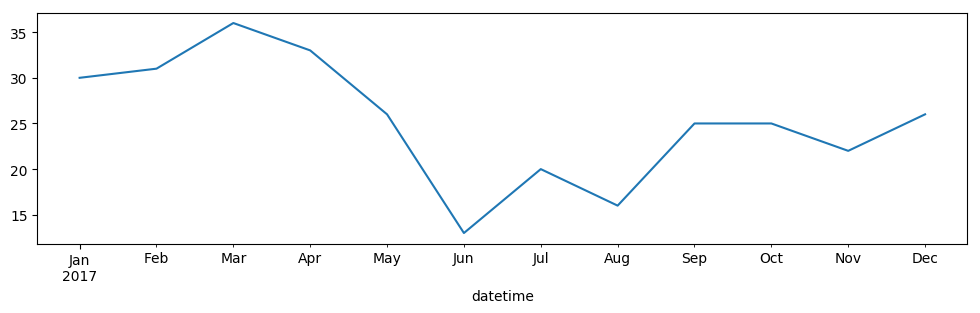

In [52]:
# 畫出各月 PM 2.5 濃度的平均數折線圖
s_pm25.resample('M').apply(np.median).plot()

若 DataFrame 的 index 不為 `datetime` 型態的時間序列資料，可以使用 parameter `on=` 來指定 `datetime` 型態時間序列資料的 Column 名稱。

In [53]:
# 先將 df_noindex 的 'datetime' column 的 data type 轉換為 datetime
df_noindex['datetime'] = pd.to_datetime(df_noindex.loc[:, 'datetime'])

# 對 PM2.5、PM10 （column label：'PM10'）的資料重新抽樣，再計算出各月 PM 2.5 濃度的算數平均數
df_orig_pm25_pm10 = df_noindex.loc[:, ['datetime', 'PM2.5', 'PM10']]
df_orig_pm25_pm10.resample('M', on='datetime').apply(np.mean)

# 還原資料
df_noindex = df_noindex_bak.copy()

### `.aggregate()` : 對結合後的資料調用多個敘述統計 function

如果要對一份資料同時製作多個敘述性統計分析，除了調用 `.drescibe()` method 以外，當還有額外的需求時，也可以利用這個 method 來達成。

* 參考文件：
    * [pandas.DataFrame.aggregate](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.aggregate.html)
    * [GroupBy: split-apply-combine](https://pandas.pydata.org/pandas-docs/stable/groupby.html#aggregation)

In [54]:
# 僅使用單一敘述統計的 function
# 例：計算各項空氣品質指摽的平均
display(df.aggregate('mean'))

AMB_TEMP        24.590633
CH4              2.034242
CO               0.281980
NMHC             0.072598
NO               2.197697
NO2              9.169885
NOx             11.363841
O3              31.892605
PM10            70.665159
PM2.5           27.819263
                 ...     
WIND_DIREC     113.507639
WIND_SPEED       3.393404
WS_HR            2.495462
year          2017.000000
month            6.526027
day             15.720548
hour            11.500000
minute           0.000000
second           0.000000
weekday          3.008219
Length: 25, dtype: float64

In [55]:
# 針對各個 column 指定執行不同的敘述統計 function
# 作法：寫在 dict 內
# 例：計算大氣溫度 (column label: 'AMB_TEMP') 的最小值、
# PM 2.5 (column label: 'PM2.5') 的平均值
# 以及一氧化氮 (column label: 'NO') 的最大值
df.aggregate({'AMB_TEMP':'min', 'PM2.5':'mean', 'NO': 'max'})

AMB_TEMP    13.000000
PM2.5       27.819263
NO          38.000000
dtype: float64

In [56]:
# 對所有 column 指定執行多種不同的敘述統計 function
# 作法：寫在 list 內
# 力：觀察所有空氣品質指標的平均、最大值、最小值、標準差
df.aggregate(['mean', 'max', 'min', 'std'])

,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10,PM2.5,...,WIND_DIREC,WIND_SPEED,WS_HR,year,month,day,hour,minute,second,weekday
mean,24.590633,2.034242,0.28198,0.072598,2.197697,9.169885,11.363841,31.892605,70.665159,27.819263,...,113.507639,3.393404,2.495462,2017.0,6.526027,15.720548,11.500000,0.0,0.0,3.008219
max,34.000000,8.600000,1.84000,3.090000,38.000000,38.000000,65.000000,105.000000,549.000000,121.000000,...,360.000000,12.000000,10.000000,2017.0,12.000000,31.000000,23.000000,0.0,0.0,6.000000
min,13.000000,1.700000,0.02000,-0.030000,-0.500000,0.700000,1.300000,1.000000,9.000000,2.000000,...,0.000000,0.400000,0.000000,2017.0,1.000000,1.000000,0.000000,0.0,0.0,0.000000
std,5.065055,0.334770,0.13375,0.077559,2.084884,5.037761,6.142313,17.085349,48.478237,15.274430,...,102.146535,2.139149,1.829496,0.0,3.448048,8.796749,6.922582,0.0,0.0,2.003519


In [57]:
# 也可以配合 groupby() 使用，預先集合相同條件的資料再執行敘述統計 function
# 例：觀察同年、月份資料的平均值、標準差
df.groupby(['year', 'month']).aggregate(['mean', 'std'])

AMB_TEMP                 CH4                  CO            \
                 mean       std      mean       std      mean       std   
year month                                                                
2017 1      19.326146  2.069988  1.992683  0.220400  0.321137  0.135591   
     2      17.589552  2.275537  2.019365  0.273507  0.333089  0.137832   
     3      19.599185  2.448034  2.071547  0.364227  0.370300  0.140992   
     4      23.351389  3.281019  2.116179  0.408110  0.336196  0.142954   
     5      27.364738  1.944013  2.166439  0.452429  0.277815  0.117566   
     6      29.143056  1.954370  1.950070  0.281934  0.175091  0.088265   
     7      29.916438  2.012275  2.038736  0.388146  0.198811  0.079641   
     8      29.831989  1.712121  2.001085  0.295526  0.199823  0.088366   
     9      29.518056  1.761023  2.106311  0.405062  0.251650  0.123721   
     10     26.598118  3.152652  2.007278  0.275888  0.298782  0.114327   
     11     23.327778  1.963734  1.957525  0.214270  0.276811  0.099980   
     12     19.086022  2.127337  1.983671  0.253762  0.345539  0.134302   

                NMHC                  NO              ...      day            \
                mean       std      mean       std    ...     mean       std   
year month                                            ...                      
2017 1      0.062764  0.045330  2.349593  1.928985    ...     16.0  8.950289   
     2      0.065628  0.050938  2.274379  2.299708    ...     14.5  8.083764   
     3      0.082804  0.061879  2.353278  1.897545    ...     16.0  8.950289   
     4      0.081158  0.057077  2.168029  1.987163    ...     15.5  8.661458   
     5      0.075307  0.055933  1.918244  1.543583    ...     16.0  8.950289   
     6      0.068340  0.057929  2.548536  1.850136    ...     15.5  8.661458   
     7      0.073791  0.046535  2.181994  1.847901    ...     16.0  8.950289   
     8      0.092700  0.198206  2.347340  1.662331    ...     16.0  8.950289   
     9      0.074614  0.062059  2.444429  2.413436    ...     15.5  8.661458   
     10     0.062601  0.041583  1.845404  1.586071    ...     16.0  8.950289   
     11     0.056554  0.046860  1.580731  1.591096    ...     15.5  8.661458   
     12     0.074089  0.054484  2.359865  3.448923    ...     16.0  8.950289   

            hour           minute      second        weekday            
            mean       std   mean  std   mean  std      mean       std  
year month                                                              
2017 1      11.5  6.926843      0  0.0      0  0.0  2.935484  2.079478  
     2      11.5  6.927343      0  0.0      0  0.0  3.000000  2.001490  
     3      11.5  6.926843      0  0.0      0  0.0  3.000000  1.918950  
     4      11.5  6.926999      0  0.0      0  0.0  3.166667  2.035840  
     5      11.5  6.926843      0  0.0      0  0.0  2.806452  2.008102  
     6      11.5  6.926999      0  0.0      0  0.0  3.033333  1.941853  
     7      11.5  6.926843      0  0.0      0  0.0  3.064516  2.079478  
     8      11.5  6.926843      0  0.0      0  0.0  2.903226  1.941622  
     9      11.5  6.926999      0  0.0      0  0.0  3.100000  1.973679  
     10     11.5  6.926843      0  0.0      0  0.0  2.935484  2.079478  
     11     11.5  6.926999      0  0.0      0  0.0  2.966667  1.941853  
     12     11.5  6.926843      0  0.0      0  0.0  3.193548  2.008102  

[12 rows x 46 columns]